In [1]:
"""
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
pip install torchvision==0.14.1
pip install torchaudio==0.13.1
pip install torchdata==0.5.1
pip install torchtext==0.14.1

pip install diffusers==0.11.1
pip install -q accelerate
pip install -q transformers
pip install -q ftfy
pip install -q bitsandbytes==0.35.0
pip install -q gradio
pip install -q natsort
pip install -q safetensors
pip install -q xformers

nvidia-smi
"""

'\npip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121\npip install torchvision==0.14.1\npip install torchaudio==0.13.1\npip install torchdata==0.5.1\npip install torchtext==0.14.1\n\npip install diffusers==0.11.1\npip install -q accelerate\npip install -q transformers\npip install -q ftfy\npip install -q bitsandbytes==0.35.0\npip install -q gradio\npip install -q natsort\npip install -q safetensors\npip install -q xformers\n\nnvidia-smi\n'

In [2]:
!nvidia-smi

Wed Feb 21 22:35:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060       WDDM | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P5               18W / 170W|   1812MiB /  8192MiB |     20%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
from diffusers import StableDiffusionPipeline

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xformers\__init__.py", line 55, in _is_triton_available
    from xformers.triton.softmax import softmax as triton_softmax  # noqa
  File "C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xformers\triton\softmax.py", line 11, in <module>
    import triton
ModuleNotFoundError: No module named 'triton'


In [4]:
torch.cuda.is_available()

True

In [5]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

safety_checker\model.safetensors not found
Fetching 30 files: 100%|██████████| 30/30 [00:00<?, ?it/s]
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [6]:
pipe = pipe.to('cuda')

In [7]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

100%|██████████| 50/50 [01:42<00:00,  2.04s/it] 


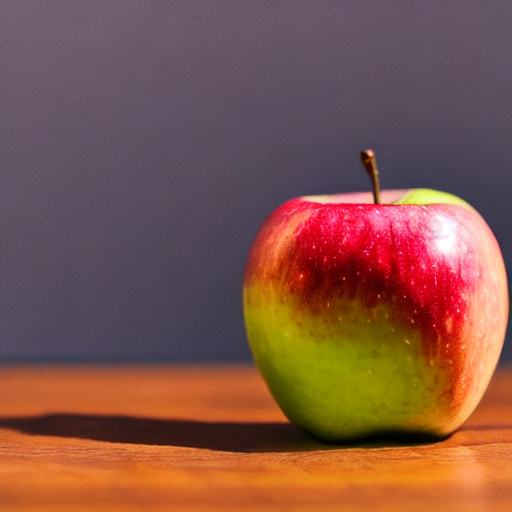

In [8]:
prompt = 'an apple'
img = pipe(prompt).images[0]
img